# Stumps, trees and forests

** Ecole Centrale Nantes **

** Diana Mateus **

PARTICIPANTS: **(Fill in your names)**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 1. Decision stumps
A decision stump is a machine learning model consisting of a one-level decision tree. That is, it is a decision tree with one internal node (the root) which is immediately connected to the terminal nodes (its leaves). A decision stump makes a prediction based on the value of just a single input feature. Sometimes they are also called 1-rules [Wikipedia]

***a)*** Run the provided code to generate and plot a toy dataset consisting of 2D points and 4 classes



C:\Users\yiann\AppData\Local\Temp\ipykernel_20908\2157193800.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.get_cmap('rainbow', 4));


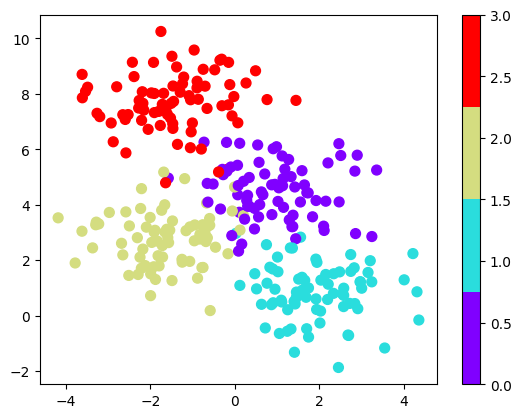

In [2]:
#a) Load and plot dataset, split in train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

n_classes = 4
X, y = make_blobs(n_samples=300, centers=n_classes,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.get_cmap('rainbow', 4));
plt.colorbar();

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)




**b)** Observe the functions **stump** and **split**.

**stump** is a function that generates the parameters of a random axis-aligned split  according to the number of features of a given dataset. The function receives the data matrix Xtrain and returns
    - the index of one randomly chosen feature (one dimension)
    - as well as a randomly chosen threshold within the min and max values of the chosen feature.

**split**  receives as input:
    - A dataset of points
    - the parameters generated by the stump function above.
The function then partitions the *dataset* in two subsets according to the threshold of the chosen dimension.
The output are two arrays, each containing the _indices_ of the points belonging to one or the other subset.

**c)** Run the split function **several times**, and display the resulting subsets as 2D scatter plots with circles of different colors for each class. Use the provided plotting functions.

In [ ]:
from random import randint, uniform

# b) Stumps and Split

def stump(X):
    f = randint(0, X.shape[1]-1) #randomly select a feature/dimension randint()
    t = uniform(np.min(X[:,f]),np.max(X[:,f])) #sample from an uniform() between the min and max values of the feature
    return f,t


def split(X, f, t):
    ind_l, = np.where(X[:,f]<=t)
    ind_r, = np.where(X[:,f]>t)
    return ind_l, ind_r

# c) Plotting a stump

def plot_stump (Xtrain,ytrain,feat,th,ind_l,ind_r):
    n_classes=np.max(ytrain)+1;
    #print(n_classes)
    for c in range(n_classes):
        X0_c=Xtrain[np.where(ytrain==c), 0] #first coordinate of points belonging to class c
        X1_c=Xtrain[np.where(ytrain==c), 1] #second coordinate of points belonging to class c
        plt.scatter(X0_c,X1_c, s=50,alpha=0.5,cmap=plt.cm.get_cmap('rainbow', 4),label=str(c))

    #plt.axis('equal')

    #draw the points on the left and right child as circles around the original training dataset
    plt.scatter(Xtrain[ind_l, 0], Xtrain[ind_l, 1], c='none', edgecolor='r')
    plt.scatter(Xtrain[ind_r, 0], Xtrain[ind_r, 1], c='none', edgecolor='b')

    #draw threshold line
    if feat == 0:
        plt.plot([th,th],[np.min(Xtrain[:,1]),np.max(Xtrain[:,1])])
    elif feat == 1:
        plt.plot([np.min(Xtrain[:,0]),np.max(Xtrain[:,0])],[th,th])
    leg = plt.legend();


feat, th = stump(Xtrain)
print('Stump parameters', feat, th)
ind_l,ind_r = split(Xtrain, feat, th)
print('Sizes: original set:', len(ytrain),
      ' left subset:' ,  ind_l.shape,
      ' right subset:', ind_r.shape)


plot_stump(Xtrain,ytrain,feat,th,ind_l,ind_r)



**d)** Implement a function ***class_distributions*** that given a set of points reaching a node returns the posterior class distribution of the node (approximated as the normalized histogram with #points per class).

``` python
def class_distributions(ytrain,num_classes):
```

Compute the class distributions of:
    - of the original training set (before the split),
    - of each of the 2 subsets resulting from after the split has been applied.

Plot the histograms of the children nodes

**e)** Create a function to compute the ***information_gain*** of a split. The function should receive the full training dataset (Xtrain and ytrain) and the indices of two subsets resulting from the current split.

``` python
def information_gain(ytrain,ind_left, ind_right,num_classes):
```
```Hint: ```  when computing the Entropy, ignore the classes with zero probabilities, and carry on summation using the same equation.



**f)** Create a function ***train*** to perfom a *randomized node optimization*. The function receives as parameters the full training dataset (Xtrain and ytrain) as well as the number of random stumps to try. The function will
- generate the desired number of stumps,
- split the dataset according to each stump,
- evaluate the ***information gain*** for each split
- choose and then return the parameters of the best stump.

``` python
def train_stumps(Xtrain, ytrain, trials):
```

Print the progress of the information gain during the training process

**g)** Make predictions with the trained model and display the restuls

## 3. Comparing classifiers on the Caltech 101 dataset

Compare the performances of an SVM, a Decision Tree and Random Forest classifiers on the 10 classes subset of the **Caltech 101** dataset.
Focus here on the **multi-class** classification task (e.g. 5 classes).
Reuse the `loadImagesAndLabels()` and `buildDataset()` functions from the SVM lab course.


**a)** Load and split the dataset

**b)** Train three classification models on the train dataset
- a Logistic Regression
- an SVM
- a single decision tree ``sklearn.tree.DecisionTree``
- a Random Forest ``sklearn.ensemble.RandomForestClassifier``

Question: Which among these are natively multi-class classifiers?

Print the accuracy on the train and test sets for each model. ``from sklearn import metrics``

**c)** Can we use ROC curves directly in this case? How ?

**d)** Do a gridsearch with a 5-fold crossvalidation varying the hyperparameters of each model (e.g., for the SVM the ``kernel``, the ``gamma`` and ``c``, and for the tree-based models  ``max_depth``, ``max_features``, ``min_samples_leaf``, and ``n_estimators``).

``from sklearn.model_selection import GridSearchCV``

**Hint**
```
tuned_parameters = [{'max_depth': [1, 5, 10],
                     'max_features': [1, 15, 30, 45, 60],
                     'n_estimators': [1, 25, 50, 75, 100],
                     'min_samples_leaf': [3,5,10]}]
                     
```
- What are the best parameters found to maximize the area under the curve in each case?

**e)** Discuss the results and curves.